(3.2821677372594418e-09-1.565736195756674e-09j)


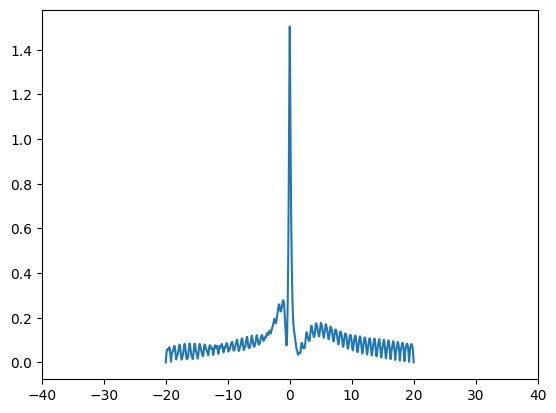

In [ ]:
from Solve import psi
import numpy as np
n = 9999
wavefunction, x, t = psi([-200, 4001, -10, n])
print(wavefunction[50,50])

import matplotlib.pyplot as plt
plt.plot(x, abs(wavefunction[n//2]))
plt.xlim(-40, 40)
#plt.ylim(0, 5)
plt.show()

In [11]:
from Res_visualisation import *
from Parameters import pars_YanPengPhysRevA_78_033821
from Hydrogen import Hydrogen
from Field import Field

params = pars_YanPengPhysRevA_78_033821()[0]
H = Hydrogen()
F = Field.Pulse(params)
field = F(t, 'Real')
pot = H.potential(x)
plot_HH_spectrum(x, t, wavefunction, params, pot, field, Z=1)
imshow_time_frequency_characteristics(x, t, wavefunction, params, pot, field)

MemoryError: Unable to allocate 18.4 GiB for an array with shape (4999, 4999, 99) and data type float64